# Import data

In [390]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv("superstore_final_dataset.csv", encoding="cp1250")


# Overview

In [391]:
# Check the number of rows and columns
print(df.shape)

(9800, 18)


In [392]:
# Check initial columns types
print(df.dtypes)

Row_ID             int64
Order_ID          object
Order_Date        object
Ship_Date         object
Ship_Mode         object
Customer_ID       object
Customer_Name     object
Segment           object
Country           object
City              object
State             object
Postal_Code      float64
Region            object
Product_ID        object
Category          object
Sub_Category      object
Product_Name      object
Sales            float64
dtype: object


In [393]:
# Change the type of columns
df["Order_Date"] = pd.to_datetime(df["Order_Date"], dayfirst=True, errors="coerce")
df["Ship_Date"] = pd.to_datetime(df["Ship_Date"], dayfirst=True, errors="coerce")
df['Postal_Code'] = df['Postal_Code'].astype('Int64').astype(str)


In [394]:
# Structure table
structure_table = pd.DataFrame({
    "Typ danych": df.dtypes.astype(str),
    "Liczba braków": df.isnull().sum().values,
    "Przykładowa wartość": [df[col].dropna().iloc[0] for col in df.columns]
})

print(structure_table)



                   Typ danych  Liczba braków  \
Row_ID                  int64              0   
Order_ID               object              0   
Order_Date     datetime64[ns]              0   
Ship_Date      datetime64[ns]              0   
Ship_Mode              object              0   
Customer_ID            object              0   
Customer_Name          object              0   
Segment                object              0   
Country                object              0   
City                   object              0   
State                  object              0   
Postal_Code            object              0   
Region                 object              0   
Product_ID             object              0   
Category               object              0   
Sub_Category           object              0   
Product_Name           object              0   
Sales                 float64              0   

                             Przykładowa wartość  
Row_ID                              

In [395]:
# Count unique values
print(df.nunique())

Row_ID           9800
Order_ID         4922
Order_Date       1230
Ship_Date        1326
Ship_Mode           4
Customer_ID       793
Customer_Name     793
Segment             3
Country             1
City              529
State              49
Postal_Code       627
Region              4
Product_ID       1861
Category            3
Sub_Category       17
Product_Name     1849
Sales            5757
dtype: int64


In [396]:
# List and count unique values

print("Region:", df["Region"].unique())
print("Unique values:", df["Region"].nunique())

print("\nSegment:", df["Segment"].unique())
print("Unique values:", df["Segment"].nunique())

print("\nCategory:", df["Category"].unique())
print("Unique values:", df["Category"].nunique())

print("\nSub_Category:", df["Sub_Category"].unique())
print("Unique values:", df["Sub_Category"].nunique())

Region: ['South' 'West' 'Central' 'East']
Unique values: 4

Segment: ['Consumer' 'Corporate' 'Home Office']
Unique values: 3

Category: ['Furniture' 'Office Supplies' 'Technology']
Unique values: 3

Sub_Category: ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
Unique values: 17


In [397]:
# Show max and min

print("Order_Date")
print("Min:", df["Order_Date"].min())
print("Max:", df["Order_Date"].max())

print("\nSales")
print("Min:", df["Sales"].min())
print("Max:", df["Sales"].max())

Order_Date
Min: 2015-01-03 00:00:00
Max: 2018-12-30 00:00:00

Sales
Min: 0.444
Max: 22638.48


# Data exploration

## Seasonality and time trends

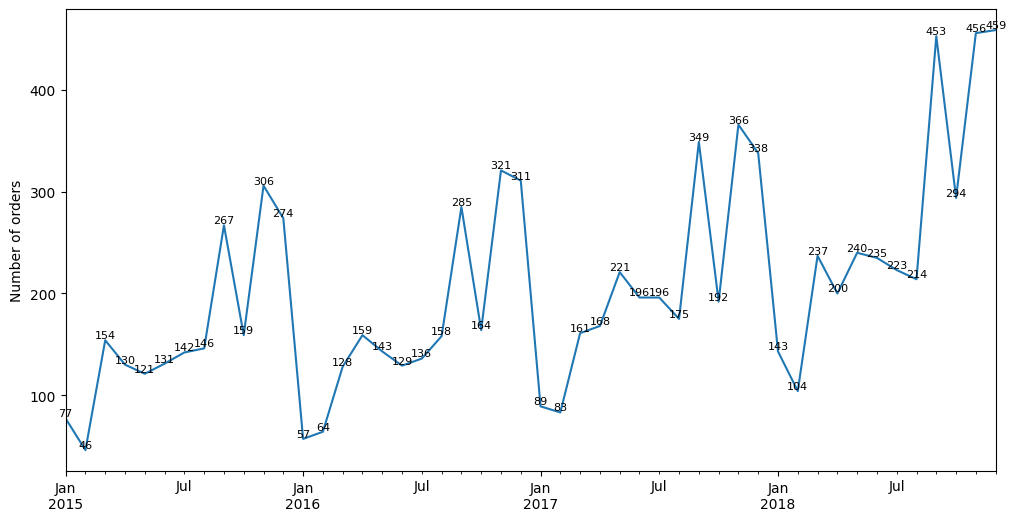

In [398]:
# Number of orders per month

orders_per_month = df.groupby(df["Order_Date"].dt.to_period("M"))["Order_ID"].count()
ax =  orders_per_month.plot(kind="line", figsize=(12,6))
plt.ylabel("Number of orders")
plt.xlabel("")
for x, y in zip(orders_per_month.index.astype(str), orders_per_month.values):
    ax.text(x, y, str(y), ha="center", va="bottom", fontsize=8)
plt.show()

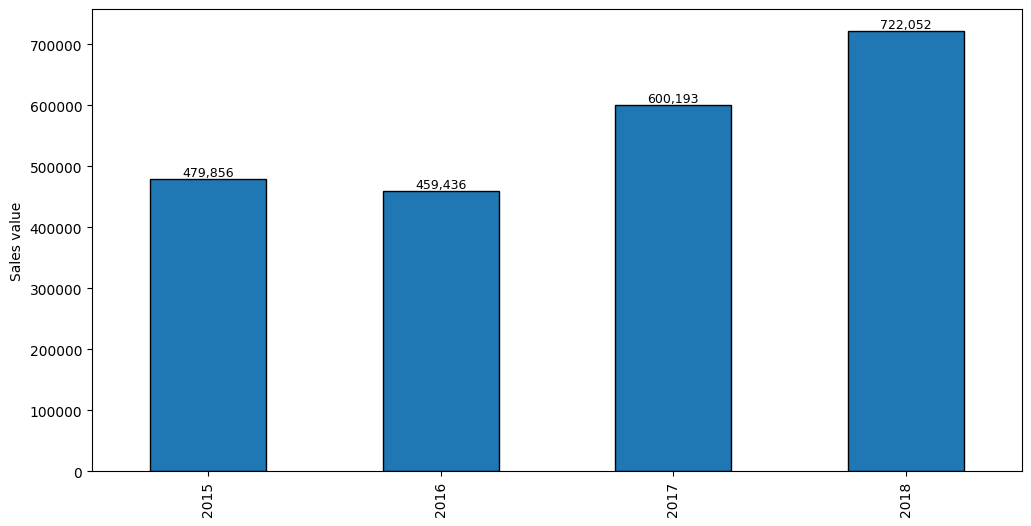

In [399]:
# Orders value per year

sales_per_year = df.groupby(df["Order_Date"].dt.year)["Sales"].sum()
ax = sales_per_year.plot(kind="bar", figsize=(12,6), edgecolor="black")
plt.ylabel("Sales value")
plt.xlabel("")

for i, v in enumerate(sales_per_year.values):
    ax.text(i, v, f"{v:,.0f}", ha="center", va="bottom", fontsize=9)

plt.show()


## Customers structure

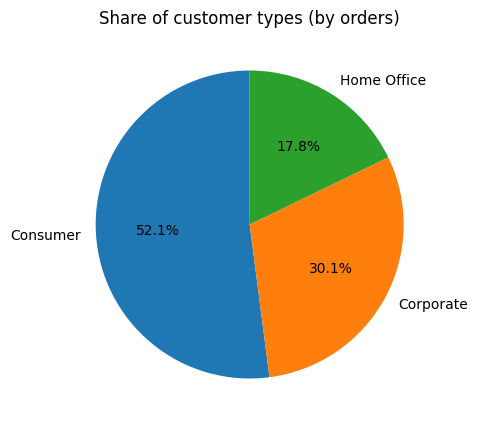

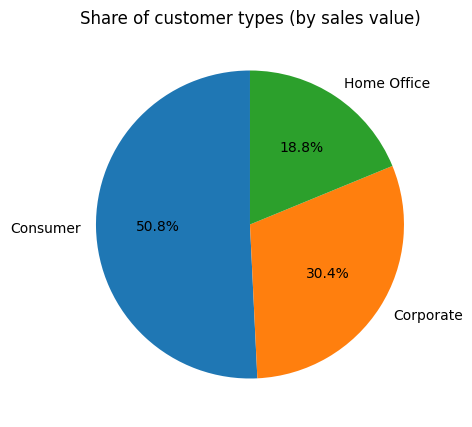

In [400]:
# Share of customer types (orders)
share = df["Segment"].value_counts(normalize=True) * 100
share.plot(kind="pie", autopct="%.1f%%", figsize=(5,5), startangle=90)
plt.title("Share of customer types (by orders)")
plt.ylabel("")
plt.show()

# Share of customer types (sales value)
share_value = df.groupby("Segment")["Sales"].sum()
share_value = share_value / share_value.sum() * 100
share_value.plot(kind="pie", autopct="%.1f%%", figsize=(5,5), startangle=90)
plt.title("Share of customer types (by sales value)")
plt.ylabel("")
plt.show()

## Geographic structure

In [401]:
# States by sales value (top 10)
sales_per_state = df.groupby("State")["Sales"].sum().reset_index()

us_state_to_abbrev = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "District of Columbia": "DC", "Florida": "FL", "Georgia": "GA", "Hawaii": "HI",
    "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS",
    "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS",
    "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI",
    "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX",
    "Utah": "UT", "Vermont": "VT", "Virginia": "VA", "Washington": "WA",
    "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}

state_coords = {
    "Alabama": (32.8, -86.6), "Alaska": (61.4, -152.3), "Arizona": (34.2, -111.6),
    "Arkansas": (34.9, -92.4), "California": (37.3, -119.7), "Colorado": (39.0, -105.5),
    "Connecticut": (41.6, -72.7), "Delaware": (39.0, -75.5), "Florida": (27.8, -81.5),
    "Georgia": (32.6, -83.4), "Hawaii": (20.8, -156.3), "Idaho": (44.1, -114.6),
    "Illinois": (40.0, -89.2), "Indiana": (40.0, -86.3), "Iowa": (42.0, -93.5),
    "Kansas": (38.5, -98.0), "Kentucky": (37.8, -85.8), "Louisiana": (30.9, -91.9),
    "Maine": (45.3, -69.2), "Maryland": (39.0, -76.7), "Massachusetts": (42.4, -71.5),
    "Michigan": (44.2, -85.6), "Minnesota": (46.7, -94.6), "Mississippi": (32.7, -89.7),
    "Missouri": (38.5, -92.5), "Montana": (46.9, -110.4), "Nebraska": (41.5, -99.8),
    "Nevada": (39.5, -116.9), "New Hampshire": (43.9, -71.6), "New Jersey": (40.1, -74.7),
    "New Mexico": (34.4, -106.1), "New York": (43.0, -75.0),
    "North Carolina": (35.5, -79.4), "North Dakota": (47.5, -100.5),
    "Ohio": (40.3, -82.8), "Oklahoma": (35.6, -97.5), "Oregon": (43.9, -120.6),
    "Pennsylvania": (41.0, -77.6), "Rhode Island": (41.7, -71.6),
    "South Carolina": (33.9, -80.9), "South Dakota": (44.4, -100.2),
    "Tennessee": (35.9, -86.3), "Texas": (31.0, -99.9), "Utah": (39.3, -111.7),
    "Vermont": (44.0, -72.7), "Virginia": (37.5, -78.8), "Washington": (47.4, -120.5),
    "West Virginia": (38.6, -80.6), "Wisconsin": (44.5, -89.5), "Wyoming": (43.0, -107.6),
    "District of Columbia": (38.9, -77.0)
}

sales_per_state["StateCode"] = sales_per_state["State"].map(us_state_to_abbrev)

top10 = sales_per_state.sort_values("Sales", ascending=False).head(10)
top10["Lat"] = top10["State"].map(lambda x: state_coords[x][0])
top10["Lon"] = top10["State"].map(lambda x: state_coords[x][1])

color_scale = ["#FFFFFF", "#9ecae1", "#3182bd"]

fig = px.choropleth(
    sales_per_state,
    locations="StateCode",
    locationmode="USA-states",
    color="Sales",
    scope="usa",
    color_continuous_scale=color_scale
)

fig.add_trace(go.Scattergeo(
    locationmode="USA-states",
    lon=top10["Lon"],
    lat=top10["Lat"],
    text=[f"{code}<br>${val:,.0f}" for code, val in zip(top10["StateCode"], top10["Sales"])],
    mode="text",
    showlegend=False
))

fig.update_layout(width=1200, height=800)
fig.show()


## Products structure

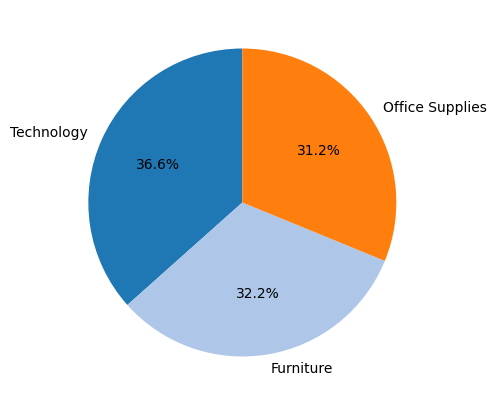

In [402]:
# Share of products categories (sales value)
sales_by_category = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(5,5))
plt.pie(
    sales_by_category,
    labels=sales_by_category.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.tab20.colors
)
plt.show()

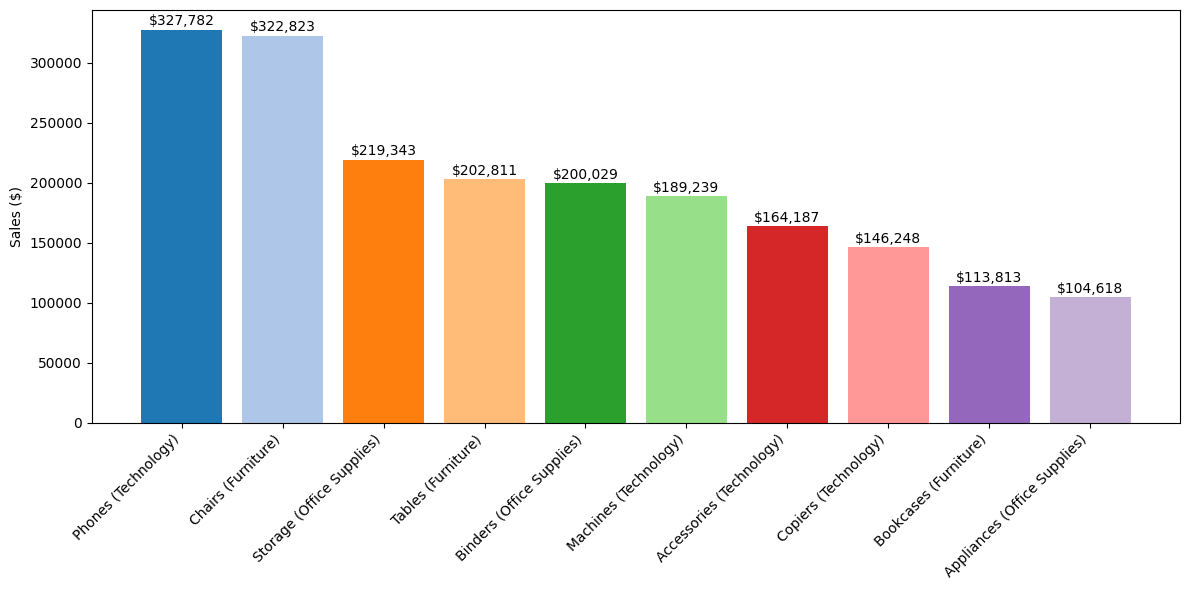

In [403]:
# Sales value of su-categories

top_subcat = (
    df.groupby(["Sub_Category", "Category"])["Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))
bars = plt.bar(
    [f"{sub} ({cat})" for sub, cat in top_subcat.index],
    top_subcat.values,
    color=plt.cm.tab20.colors[:10]
)

plt.ylabel("Sales ($)")
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, f"${yval:,.0f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Segmentation

In [404]:
# Removing extra columns and aggregating sales value
df_small = df[["Order_Date", "Order_ID", "Customer_ID", "Sales"]]
df_grouped = df_small.groupby(["Order_Date", "Order_ID", "Customer_ID"], as_index=False)["Sales"].sum()

print(df_grouped.head())


  Order_Date        Order_ID Customer_ID    Sales
0 2015-01-03  CA-2015-103800    DP-13000   16.448
1 2015-01-04  CA-2015-112326    PO-19195  288.060
2 2015-01-05  CA-2015-141817    MB-18085   19.536
3 2015-01-06  CA-2015-106054    JO-15145   12.780
4 2015-01-06  CA-2015-130813    LS-17230   19.440


## RFM

In [405]:
# R-F-M values
rfm = df_grouped.groupby("Customer_ID").agg({
    "Order_Date": lambda x: (df_grouped["Order_Date"].max() - x.max()).days,
    "Order_ID": "nunique",
    "Sales": "sum"
}).reset_index()

rfm.rename(columns={
    "Order_Date": "Recency",
    "Order_ID": "Frequency",
    "Sales": "Monetary"
}, inplace=True)

rfm["Monetary"] = rfm["Monetary"].round(0)

rfm.head()

,Customer_ID,Recency,Frequency,Monetary
0,AA-10315,184,5,5564.0
1,AA-10375,19,9,1056.0
2,AA-10480,259,4,1791.0
3,AA-10645,55,6,5087.0
4,AB-10015,415,3,886.0


In [406]:
# Medians
R_median = rfm["Recency"].median()
F_median = rfm["Frequency"].median()
M_median = rfm["Monetary"].median()

print(R_median)
print(F_median)
print(M_median)

75.0
6.0
2215.0


In [407]:
# R-F-M labels
rfm["Recency_lvl"] = rfm["Recency"].apply(lambda x: "High" if x > R_median else "Low")
rfm["Frequency_lvl"] = rfm["Frequency"].apply(lambda x: "High" if x > F_median else "Low")
rfm["Monetary_lvl"] = rfm["Monetary"].apply(lambda x: "High" if x > M_median else "Low")

rfm

,Customer_ID,Recency,Frequency,Monetary,Recency_lvl,Frequency_lvl,Monetary_lvl
0,AA-10315,184,5,5564.0,High,Low,High
1,AA-10375,19,9,1056.0,Low,High,Low
2,AA-10480,259,4,1791.0,High,Low,Low
3,AA-10645,55,6,5087.0,Low,Low,High
4,AB-10015,415,3,886.0,High,Low,Low
...,...,...,...,...,...,...,...
788,XP-21865,43,11,2375.0,Low,High,High
789,YC-21895,4,5,5454.0,Low,Low,High
790,YS-21880,9,8,6720.0,Low,High,High
791,ZC-21910,54,13,8026.0,Low,High,High


In [408]:
# Segments lables
def assign_segment(row):
    if row["Recency_lvl"] == "Low" and row["Frequency_lvl"] == "Low" and row["Monetary_lvl"] == "Low":
        return "Nowy klient"
    elif row["Recency_lvl"] == "High" and row["Frequency_lvl"] == "High" and row["Monetary_lvl"] == "Low":
        return "Regularny klient niskoobrotowy"
    elif row["Recency_lvl"] == "High" and row["Frequency_lvl"] == "High" and row["Monetary_lvl"] == "High":
        return "Regularny klient wysokoobrotowy"
    elif row["Recency_lvl"] == "High" and row["Frequency_lvl"] == "Low" and row["Monetary_lvl"] == "High":
        return "Idealny klient"
    elif row["Recency_lvl"] == "High" and row["Frequency_lvl"] == "Low" and row["Monetary_lvl"] == "Low":
        return "Utracony klient"
    else:
        return "Inny"

rfm["Segment_name"] = rfm.apply(assign_segment, axis=1)
print(rfm[["Customer_ID", "Recency_lvl", "Frequency_lvl", "Monetary_lvl", "Segment_name"]].head())



  Customer_ID Recency_lvl Frequency_lvl Monetary_lvl     Segment_name
0    AA-10315        High           Low         High   Idealny klient
1    AA-10375         Low          High          Low             Inny
2    AA-10480        High           Low          Low  Utracony klient
3    AA-10645         Low           Low         High             Inny
4    AB-10015        High           Low          Low  Utracony klient


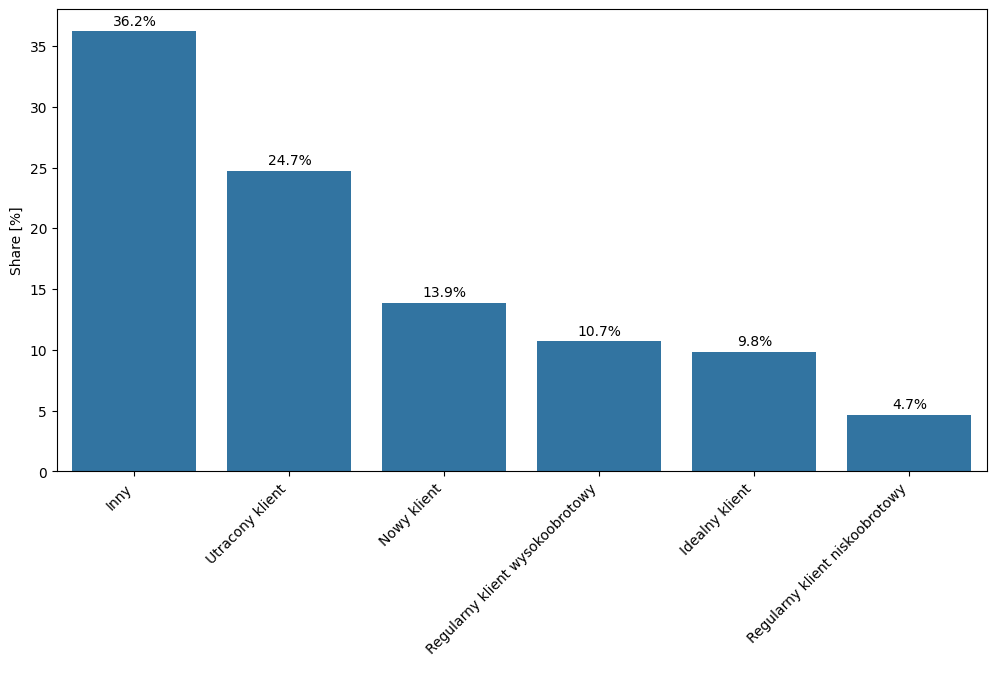

In [409]:
# RFM chart
segment_counts = rfm["Segment_name"].value_counts(normalize=True) * 100

plt.figure(figsize=(12,6))
sns.barplot(x=segment_counts.index, y=segment_counts.values)

plt.ylabel("Share [%]")
plt.xlabel(" ")

for i, v in enumerate(segment_counts.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha="center", fontsize=10)

plt.xticks(rotation=45, ha="right")
plt.show()

In [410]:
# "Inny" category
other_customers = rfm[rfm["Segment_name"] == "Inny"]

other_combinations = other_customers.groupby(["Recency_lvl", "Frequency_lvl", "Monetary_lvl"]).size().reset_index(name="Count")

other_combinations_sorted = other_combinations.sort_values("Count", ascending=False)

print(other_combinations_sorted)


  Recency_lvl Frequency_lvl Monetary_lvl  Count
0         Low          High         High    161
2         Low           Low         High     72
1         Low          High          Low     54


In [411]:
# New segments labels
def assign_segment_new(row):
    if row["Recency_lvl"] == "Low" and row["Frequency_lvl"] == "Low" and row["Monetary_lvl"] == "Low":
        return "Nowy klient"
    elif row["Frequency_lvl"] == "High" and row["Monetary_lvl"] == "Low":
        return "Regularny klient niskoobrotowy"
    elif row["Frequency_lvl"] == "High" and row["Monetary_lvl"] == "High":
        return "Regularny klient wysokoobrotowy"
    elif row["Recency_lvl"] == "High" and row["Frequency_lvl"] == "Low" and row["Monetary_lvl"] == "High":
        return "Idealny klient"
    elif row["Recency_lvl"] == "High" and row["Frequency_lvl"] == "Low" and row["Monetary_lvl"] == "Low":
        return "Utracony klient"
    else:
        return "Inny"

rfm["Segment_name"] = rfm.apply(assign_segment_new, axis=1)
print(rfm[["Customer_ID", "Recency_lvl", "Frequency_lvl", "Monetary_lvl", "Segment_name"]].head())

  Customer_ID Recency_lvl Frequency_lvl Monetary_lvl  \
0    AA-10315        High           Low         High   
1    AA-10375         Low          High          Low   
2    AA-10480        High           Low          Low   
3    AA-10645         Low           Low         High   
4    AB-10015        High           Low          Low   

                     Segment_name  
0                  Idealny klient  
1  Regularny klient niskoobrotowy  
2                 Utracony klient  
3                            Inny  
4                 Utracony klient  


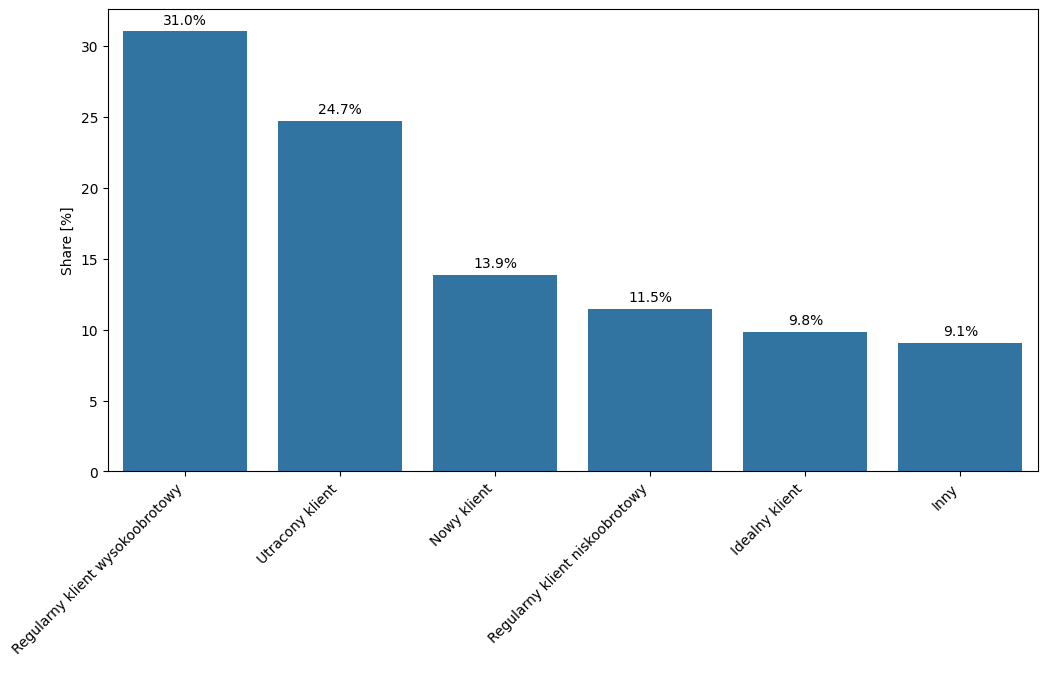

In [412]:
# New RFM chart
segment_counts_new = rfm["Segment_name"].value_counts(normalize=True) * 100

plt.figure(figsize=(12,6))
sns.barplot(x=segment_counts_new.index, y=segment_counts_new.values)

plt.ylabel("Share [%]")
plt.xlabel(" ")

for i, v in enumerate(segment_counts_new.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha="center", fontsize=10)

plt.xticks(rotation=45, ha="right")
plt.show()

## K-means

In [413]:
# Clustering
rfm_km = df.groupby("Customer_ID").agg({
    "Order_Date": lambda x: (df["Order_Date"].max() - x.max()).days,
    "Order_ID": "nunique",
    "Sales": "sum"
}).reset_index()

rfm_km.columns = ["Customer_ID", "Recency", "Frequency", "Monetary"]

rfm_km["Monetary"] = rfm_km["Monetary"].round(0)

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_km[["Recency", "Frequency", "Monetary"]])

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
rfm_km["Cluster"] = kmeans.fit_predict(rfm_scaled)

rfm_km.head()

,Customer_ID,Recency,Frequency,Monetary,Cluster
0,AA-10315,184,5,5564.0,2
1,AA-10375,19,9,1056.0,4
2,AA-10480,259,4,1791.0,0
3,AA-10645,55,6,5087.0,2
4,AB-10015,415,3,886.0,1


In [414]:
# Centroids and number of customers
cluster_summary = (
    rfm_km.groupby("Cluster")[["Recency", "Frequency", "Monetary"]]
    .mean()
    .round(2)
    .rename(columns={
        "Recency": "Recency_centroid",
        "Frequency": "Frequency_centroid",
        "Monetary": "Monetary_centroid"
    })
)

cluster_counts = rfm_km["Cluster"].value_counts().sort_index()
cluster_percent = (cluster_counts / len(rfm_km) * 100).round(2)

cluster_summary["Clients"] = cluster_counts.values
cluster_summary["Share_%"] = cluster_percent.values

print(cluster_summary)


         Recency_centroid  Frequency_centroid  Monetary_centroid  Clients  \
Cluster                                                                     
0                  109.63                4.04            1302.44      222   
1                  551.46                3.72            1445.17      101   
2                   70.45                6.55            2655.51      249   
3                  121.32                8.11            9364.12       65   
4                   77.74                9.56            3567.56      156   

         Share_%  
Cluster           
0          27.99  
1          12.74  
2          31.40  
3           8.20  
4          19.67  


## Comparison

In [415]:
# Comparison RFM and k-means
merged = rfm[["Customer_ID", "Segment_name"]].merge(
    rfm_km[["Customer_ID", "Cluster"]],
    on="Customer_ID"
)

pd.crosstab(merged["Segment_name"], merged["Cluster"], normalize="index").round(2) * 100


Cluster,0,1,2,3,4
Segment_name,,,,,
Idealny klient,29.0,24.0,33.0,13.0,0.0
Inny,15.0,0.0,72.0,12.0,0.0
Nowy klient,85.0,0.0,15.0,0.0,0.0
Regularny klient niskoobrotowy,0.0,0.0,70.0,0.0,30.0
Regularny klient wysokoobrotowy,0.0,1.0,28.0,19.0,52.0
Utracony klient,48.0,41.0,11.0,0.0,0.0
